# Sesión 3: Mapas temáticos

> 17 de Diciembre del 2025

## Import

In [2]:
import sys

sys.path.append("../src")

In [3]:
import geopandas as gpd
import pandas as pd
from geopandas.geodataframe import GeoDataFrame
import matplotlib.pyplot as plt

from config import Config

In [4]:
MONTHS = [
    "Enero",
    "Febrero",
    "Marzo",
    "Abril",
    "Mayo",
    "Junio",
    "Julio",
    "Agosto",
    "Septiembre",
    "Octubre",
    "Noviembre",
    "Diciembre",
]


class TypeOfCrime:
    HOMICIDIO_DOLOSO = "Homicidio doloso"


class Columns:
    SUBTYPE_OF_CRIME = "Subtipo de delito"
    YEAR = "Año"
    CLAVE_ENT = "Clave_Ent"
    ENTIDAD = "Entidad"
    TOTAL = "Total"

## Loading data

In [5]:
data = pd.read_csv(Config.IDFC, encoding="cp1252")
map_: GeoDataFrame = gpd.read_file(Config.MEXICO_SHAPEFILE)


data["Total"] = data[MONTHS].sum(axis=1)
data.head(5)

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2,1,2,2,2.0,1.0,18.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1,0,1,0,0,0.0,1.0,5.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2,0,1,2,0,0.0,0.0,12.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0,0,0,0,0,0.0,0.0,3.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0


In [6]:
map_.head(5)

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((2469550.852 1159302.643, 2469738.209..."
1,02,02,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.345 1227647.637, 16946..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469501.165 1978862.429, 2469539.651..."


## Filter

In [7]:
# Filtrar por delitos de homicidio doloso
data_filter = data.copy()
data_filter = data_filter[
    data_filter[Columns.SUBTYPE_OF_CRIME] == TypeOfCrime.HOMICIDIO_DOLOSO
]
data_filter.head(5)

# Agrupar por año, clave de entidad y entidad, sumando el total de homicidios dolosos
data_total_hom = data_filter.copy()
data_total_hom = (
    data_total_hom.groupby([Columns.YEAR, Columns.CLAVE_ENT, Columns.ENTIDAD])[
        Columns.TOTAL
    ]
    .sum()
    .reset_index()
)
data_total_hom.head(32)

,Año,Clave_Ent,Entidad,Total
0,2015,1,Aguascalientes,38.0
1,2015,2,Baja California,821.0
2,2015,3,Baja California Sur,151.0
3,2015,4,Campeche,49.0
4,2015,5,Coahuila de Zaragoza,278.0
5,2015,6,Colima,162.0
6,2015,7,Chiapas,502.0
7,2015,8,Chihuahua,945.0
8,2015,9,Ciudad de México,798.0
9,2015,10,Durango,236.0


In [8]:
# Verificar columnas
map_[["CVE_ENT", "NOMGEO"]].dtypes
data_total_hom[[Columns.CLAVE_ENT, Columns.ENTIDAD]].dtypes


Clave_Ent     int64
Entidad      object
dtype: object

## Reassign type

In [9]:
# Fix data type mismatch before merge
# Convert both columns to string type to ensure compatibility
map_["CVE_ENT"] = map_["CVE_ENT"].astype(str)
data_total_hom[Columns.CLAVE_ENT] = data_total_hom[Columns.CLAVE_ENT].astype(str)


In [10]:
# Filter for 2024 data
data_2024 = data_total_hom[data_total_hom[Columns.YEAR] == 2024]


In [11]:
map_ = map_.merge(
    data_total_hom[data_total_hom[Columns.YEAR] == 2024],
    left_on=["NOMGEO"],
    right_on=[Columns.ENTIDAD],
    how="left",
)


## Visualization

### Continuas

<Figure size 7500x6000 with 0 Axes>

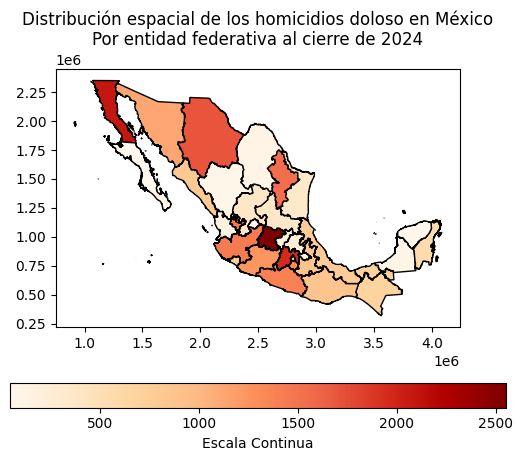

In [12]:
# Mapa temático con variable continua
plt.figure(figsize=(15, 12), dpi=500)
map_.plot(
    column="Total",
    legend=True,
    cmap="OrRd",
    legend_kwds={"label": "Escala Continua", "orientation": "horizontal"},
    edgecolor="black",
)
plt.title(
    "Distribución espacial de los homicidios doloso en México\nPor entidad federativa al cierre de 2024"
)
plt.grid(False)
plt.show()


In [13]:
map_.head(2)

,CVEGEO,CVE_ENT,NOMGEO,geometry,Año,Clave_Ent,Entidad,Total
0,01,01,Aguascalientes,"POLYGON ((2469550.852 1159302.643, 2469738.209...",2024,1,Aguascalientes,112.0
1,02,02,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",2024,2,Baja California,2089.0


### Quantiles

<Figure size 7500x6000 with 0 Axes>

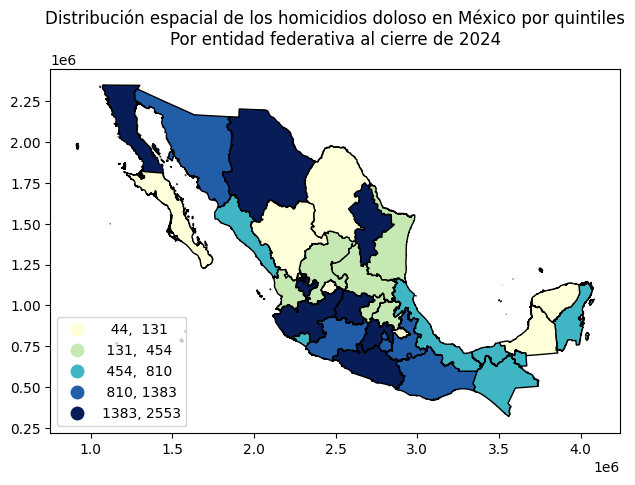

In [14]:
plt.figure(figsize=(15, 12), dpi=500)
map_.plot(
    column="Total",
    scheme="Quantiles",
    k=5,
    legend=True,
    cmap="YlGnBu",
    legend_kwds={"loc": "lower left", "fmt": "{:.0f}"},
    edgecolor="black",
)
plt.title(
    "Distribución espacial de los homicidios doloso en México por quintiles\nPor entidad federativa al cierre de 2024"
)
plt.grid(False)
plt.tight_layout()

# Sesión 4: Mapas temáticos

> 18 de Diciembre del 2025

## Visualization

<Figure size 7500x6000 with 0 Axes>

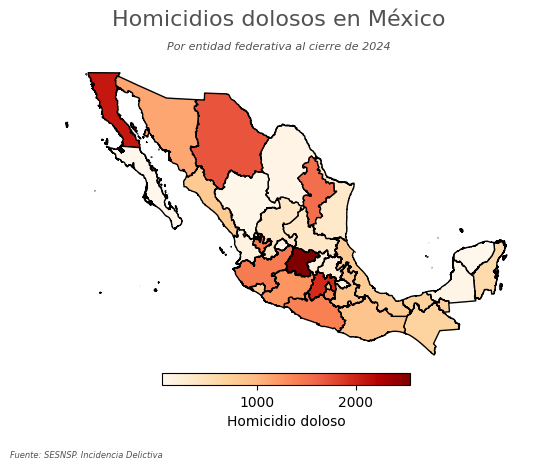

In [37]:
# Mapa temático con variable continua
plt.figure(figsize=(15, 12), dpi=500)
map_.plot(
    column="Total",
    legend=True,
    cmap="OrRd",
    legend_kwds={
        "label": TypeOfCrime.HOMICIDIO_DOLOSO,
        "orientation": "horizontal",
        "shrink": 0.5,
        "pad": 0.01,
    },
    edgecolor="black",
)
# plt.legend(prop={"size": 5})
plt.axis("off")
plt.figtext(
    0.5, 0.95, "Homicidios dolosos en México", ha="center", fontsize=16, color="#525252"
)
plt.figtext(
    0.5,
    0.90,
    "Por entidad federativa al cierre de 2024",
    ha="center",
    fontsize=8,
    color="#525252",
    style="italic",
)
plt.figtext(
    0.2,
    0.05,
    "Fuente: SESNSP. Incidencia Delictiva",
    ha="center",
    fontsize=6,
    color="#525252",
    style="italic",
)
plt.grid(False)
plt.show()